In [78]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
import dateutil.parser
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

In [79]:
# Load dataset
twitter_data_all = pd.read_csv('../../data/data_collected_ref_cleaned/2_first_solar_tweets_cleaned_v2_small.csv')

In [80]:
twitter_data_all.head()

,CreatedAt,TweetId,AuthorId,TweetText,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,2021-04-01T00:50:05.000Z,1377422984751775755,1134049078424162304,First Solar Completes Sale of North American O&amp;M Business to NovaSource $FSLR https://t.co/j...,First Solar Completes Sale of North American OampM Business to NovaSource FSLR httpstcojlkOFos,"['first', 'solar', 'completes', 'sale', 'of', 'north', 'american', 'oampm', 'business', 'to', 'n...","['first', 'solar', 'completes', 'sale', 'north', 'american', 'oampm', 'business', 'novasource', ...","['first', 'solar', 'complet', 'sale', 'north', 'american', 'oampm', 'busi', 'novasourc', 'fslr',...","['first', 'solar', 'completes', 'sale', 'north', 'american', 'oampm', 'business', 'novasource', ..."
1,2021-03-31T23:54:00.000Z,1377408871212351489,586116334,$ALYI To Reveal New Significant Investment In Company From Leading Texas Based Private Equity Fu...,ALYI To Reveal New Significant Investment In Company From Leading Texas Based Private Equity Fun...,"['alyi', 'to', 'reveal', 'new', 'significant', 'investment', 'in', 'company', 'from', 'leading',...","['alyi', 'reveal', 'new', 'significant', 'investment', 'company', 'leading', 'texas', 'based', '...","['alyi', 'reveal', 'new', 'signific', 'invest', 'compani', 'lead', 'texa', 'base', 'privat', 'eq...","['alyi', 'reveal', 'new', 'significant', 'investment', 'company', 'leading', 'texas', 'based', '..."
2,2021-03-31T23:47:40.000Z,1377407278056230912,1313171678625701889,@SolarPowerEU @renewableH2EU @EU_Commission @Akuo_Energy @enelgreenpower @EdpRenewables @Enapter...,SolarPowerEU renewableHEU EUCommission AkuoEnergy enelgreenpower EdpRenewables Enapter FirstSola...,"['solarpowereu', 'renewableheu', 'eucommission', 'akuoenergy', 'enelgreenpower', 'edprenewables'...","['solarpowereu', 'renewableheu', 'eucommission', 'akuoenergy', 'enelgreenpower', 'edprenewables'...","['solarpowereu', 'renewableheu', 'eucommiss', 'akuoenergi', 'enelgreenpow', 'edprenew', 'enapt',...","['solarpowereu', 'renewableheu', 'eucommission', 'akuoenergy', 'enelgreenpower', 'edprenewables'..."
3,2021-03-31T23:31:00.000Z,1377403081005150211,831801503694336000,$FSLR sector move confirmed https://t.co/h08Dwn5CIF,FSLR sector move confirmed httpstcohDwnCIF,"['fslr', 'sector', 'move', 'confirmed', 'httpstcohdwncif']","['fslr', 'sector', 'move', 'confirmed', 'httpstcohdwncif']","['fslr', 'sector', 'move', 'confirm', 'httpstcohdwncif']","['fslr', 'sector', 'move', 'confirmed', 'httpstcohdwncif']"
4,2021-03-31T23:29:07.000Z,1377402607010902019,1355194932445786112,$FSLR NovaSource Power Services is World's Largest Solar O&amp;M Provider with Acquisition of Fi...,FSLR NovaSource Power Services is Worlds Largest Solar OampM Provider with Acquisition of First ...,"['fslr', 'novasource', 'power', 'services', 'is', 'worlds', 'largest', 'solar', 'oampm', 'provid...","['fslr', 'novasource', 'power', 'services', 'worlds', 'largest', 'solar', 'oampm', 'provider', '...","['fslr', 'novasourc', 'power', 'servic', 'world', 'largest', 'solar', 'oampm', 'provid', 'acquis...","['fslr', 'novasource', 'power', 'service', 'world', 'largest', 'solar', 'oampm', 'provider', 'ac..."


In [81]:
# datetime = pd.to_datetime(twitter_data['CreatedAt'])

# h2 Select Columns 

In [82]:
columns = ['CreatedAt',  'TweetId', 'AuthorId', 'TweetText', 'Tweet_stemmed']
twitter_data = twitter_data_all[columns]
twitter_data.head()

,CreatedAt,TweetId,AuthorId,TweetText,Tweet_stemmed
0,2021-04-01T00:50:05.000Z,1377422984751775755,1134049078424162304,First Solar Completes Sale of North American O&amp;M Business to NovaSource $FSLR https://t.co/j...,"['first', 'solar', 'complet', 'sale', 'north', 'american', 'oampm', 'busi', 'novasourc', 'fslr',..."
1,2021-03-31T23:54:00.000Z,1377408871212351489,586116334,$ALYI To Reveal New Significant Investment In Company From Leading Texas Based Private Equity Fu...,"['alyi', 'reveal', 'new', 'signific', 'invest', 'compani', 'lead', 'texa', 'base', 'privat', 'eq..."
2,2021-03-31T23:47:40.000Z,1377407278056230912,1313171678625701889,@SolarPowerEU @renewableH2EU @EU_Commission @Akuo_Energy @enelgreenpower @EdpRenewables @Enapter...,"['solarpowereu', 'renewableheu', 'eucommiss', 'akuoenergi', 'enelgreenpow', 'edprenew', 'enapt',..."
3,2021-03-31T23:31:00.000Z,1377403081005150211,831801503694336000,$FSLR sector move confirmed https://t.co/h08Dwn5CIF,"['fslr', 'sector', 'move', 'confirm', 'httpstcohdwncif']"
4,2021-03-31T23:29:07.000Z,1377402607010902019,1355194932445786112,$FSLR NovaSource Power Services is World's Largest Solar O&amp;M Provider with Acquisition of Fi...,"['fslr', 'novasourc', 'power', 'servic', 'world', 'largest', 'solar', 'oampm', 'provid', 'acquis..."


In [83]:
print(dateutil.parser.isoparse('2008-09-03T20:56:35.450686Z'))

2008-09-03 20:56:35.450686+00:00


In [84]:
# twitter_data.head()
def change_time_type(createdAtAtribute):
    changed_time = dateutil.parser.isoparse(createdAtAtribute)
    return changed_time

In [85]:
# twitter_data['datetest'] = dateutil.parser.isoparse((twitter_data['CreatedAt']))
# twitter_data_date_test = twitter_data['CreatedAt'][0]
# twitter_data_date_test
# print(dateutil.parser.isoparse(twitter_data_date_test))
# # testing = change_time_type(twitter_data['CreatedAt'][0])
# print(twitter_data['CreatedAt'])
# print(change_time_type(twitter_data['CreatedAt'][0]))

In [86]:
twitter_data['created_datetime'] = twitter_data['CreatedAt'].apply(lambda x: change_time_type(x))
print(type(twitter_data['CreatedAt'][0]))

<class 'str'>


<ipython-input-86-7a8640f1f01b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_data['created_datetime'] = twitter_data['CreatedAt'].apply(lambda x: change_time_type(x))


In [87]:
twitter_data.head()

,CreatedAt,TweetId,AuthorId,TweetText,Tweet_stemmed,created_datetime
0,2021-04-01T00:50:05.000Z,1377422984751775755,1134049078424162304,First Solar Completes Sale of North American O&amp;M Business to NovaSource $FSLR https://t.co/j...,"['first', 'solar', 'complet', 'sale', 'north', 'american', 'oampm', 'busi', 'novasourc', 'fslr',...",2021-04-01 00:50:05+00:00
1,2021-03-31T23:54:00.000Z,1377408871212351489,586116334,$ALYI To Reveal New Significant Investment In Company From Leading Texas Based Private Equity Fu...,"['alyi', 'reveal', 'new', 'signific', 'invest', 'compani', 'lead', 'texa', 'base', 'privat', 'eq...",2021-03-31 23:54:00+00:00
2,2021-03-31T23:47:40.000Z,1377407278056230912,1313171678625701889,@SolarPowerEU @renewableH2EU @EU_Commission @Akuo_Energy @enelgreenpower @EdpRenewables @Enapter...,"['solarpowereu', 'renewableheu', 'eucommiss', 'akuoenergi', 'enelgreenpow', 'edprenew', 'enapt',...",2021-03-31 23:47:40+00:00
3,2021-03-31T23:31:00.000Z,1377403081005150211,831801503694336000,$FSLR sector move confirmed https://t.co/h08Dwn5CIF,"['fslr', 'sector', 'move', 'confirm', 'httpstcohdwncif']",2021-03-31 23:31:00+00:00
4,2021-03-31T23:29:07.000Z,1377402607010902019,1355194932445786112,$FSLR NovaSource Power Services is World's Largest Solar O&amp;M Provider with Acquisition of Fi...,"['fslr', 'novasourc', 'power', 'servic', 'world', 'largest', 'solar', 'oampm', 'provid', 'acquis...",2021-03-31 23:29:07+00:00


In [101]:
twitter_data['day'] = twitter_data['created_datetime'].apply(lambda x: "%d/%d/%d" % (x.month, x.day , x.year))

<ipython-input-101-cac6ce402a0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_data['day'] = twitter_data['created_datetime'].apply(lambda x: "%d/%d/%d" % (x.month, x.day , x.year))


In [102]:
twitter_data.head()

,CreatedAt,TweetId,AuthorId,TweetText,Tweet_stemmed,created_datetime,day
0,2021-04-01T00:50:05.000Z,1377422984751775755,1134049078424162304,First Solar Completes Sale of North American O&amp;M Business to NovaSource $FSLR https://t.co/j...,"['first', 'solar', 'complet', 'sale', 'north', 'american', 'oampm', 'busi', 'novasourc', 'fslr',...",2021-04-01 00:50:05+00:00,4/1/2021
1,2021-03-31T23:54:00.000Z,1377408871212351489,586116334,$ALYI To Reveal New Significant Investment In Company From Leading Texas Based Private Equity Fu...,"['alyi', 'reveal', 'new', 'signific', 'invest', 'compani', 'lead', 'texa', 'base', 'privat', 'eq...",2021-03-31 23:54:00+00:00,3/31/2021
2,2021-03-31T23:47:40.000Z,1377407278056230912,1313171678625701889,@SolarPowerEU @renewableH2EU @EU_Commission @Akuo_Energy @enelgreenpower @EdpRenewables @Enapter...,"['solarpowereu', 'renewableheu', 'eucommiss', 'akuoenergi', 'enelgreenpow', 'edprenew', 'enapt',...",2021-03-31 23:47:40+00:00,3/31/2021
3,2021-03-31T23:31:00.000Z,1377403081005150211,831801503694336000,$FSLR sector move confirmed https://t.co/h08Dwn5CIF,"['fslr', 'sector', 'move', 'confirm', 'httpstcohdwncif']",2021-03-31 23:31:00+00:00,3/31/2021
4,2021-03-31T23:29:07.000Z,1377402607010902019,1355194932445786112,$FSLR NovaSource Power Services is World's Largest Solar O&amp;M Provider with Acquisition of Fi...,"['fslr', 'novasourc', 'power', 'servic', 'world', 'largest', 'solar', 'oampm', 'provid', 'acquis...",2021-03-31 23:29:07+00:00,3/31/2021


In [111]:
# twitter_data.groupby(['week_year']).size()
twitter_data_by_date = twitter_data.groupby(['day']).size()
twitter_data_by_date

day
3/10/2021    112
3/11/2021     59
3/12/2021     46
3/13/2021     24
3/14/2021     17
3/15/2021     23
3/16/2021     38
3/17/2021     35
3/19/2021     49
3/20/2021     15
3/21/2021      9
3/22/2021     38
3/23/2021     19
3/24/2021     23
3/25/2021     46
3/26/2021     80
3/27/2021     23
3/28/2021     21
3/29/2021     38
3/30/2021     79
3/31/2021     63
3/6/2021       8
3/7/2021      14
3/8/2021      68
3/9/2021      49
4/1/2021       1
dtype: int64

<AxesSubplot:xlabel='day'>

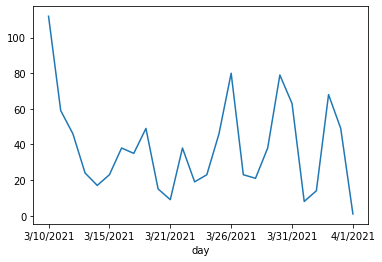

In [112]:
twitter_data_by_date.plot()

In [108]:
twitter_data.head()

,CreatedAt,TweetId,AuthorId,TweetText,Tweet_stemmed,created_datetime,day
0,2021-04-01T00:50:05.000Z,1377422984751775755,1134049078424162304,First Solar Completes Sale of North American O&amp;M Business to NovaSource $FSLR https://t.co/j...,"['first', 'solar', 'complet', 'sale', 'north', 'american', 'oampm', 'busi', 'novasourc', 'fslr',...",2021-04-01 00:50:05+00:00,4/1/2021
1,2021-03-31T23:54:00.000Z,1377408871212351489,586116334,$ALYI To Reveal New Significant Investment In Company From Leading Texas Based Private Equity Fu...,"['alyi', 'reveal', 'new', 'signific', 'invest', 'compani', 'lead', 'texa', 'base', 'privat', 'eq...",2021-03-31 23:54:00+00:00,3/31/2021
2,2021-03-31T23:47:40.000Z,1377407278056230912,1313171678625701889,@SolarPowerEU @renewableH2EU @EU_Commission @Akuo_Energy @enelgreenpower @EdpRenewables @Enapter...,"['solarpowereu', 'renewableheu', 'eucommiss', 'akuoenergi', 'enelgreenpow', 'edprenew', 'enapt',...",2021-03-31 23:47:40+00:00,3/31/2021
3,2021-03-31T23:31:00.000Z,1377403081005150211,831801503694336000,$FSLR sector move confirmed https://t.co/h08Dwn5CIF,"['fslr', 'sector', 'move', 'confirm', 'httpstcohdwncif']",2021-03-31 23:31:00+00:00,3/31/2021
4,2021-03-31T23:29:07.000Z,1377402607010902019,1355194932445786112,$FSLR NovaSource Power Services is World's Largest Solar O&amp;M Provider with Acquisition of Fi...,"['fslr', 'novasourc', 'power', 'servic', 'world', 'largest', 'solar', 'oampm', 'provid', 'acquis...",2021-03-31 23:29:07+00:00,3/31/2021


# Group By Day